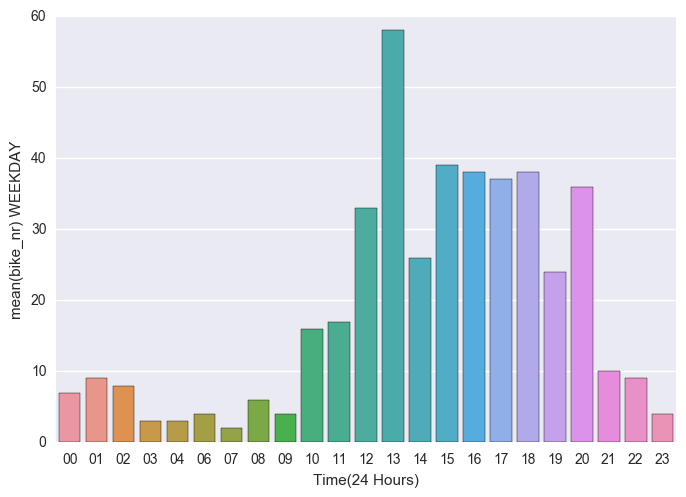

In [2]:
import os
import requests
import json
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date,datetime
import calendar
import seaborn as sns
api_key = os.environ['api_key']
username="uppalapati.kn"
def get_df(url):
    resp = requests.get(url)
    data = resp.json().get('objects')
    return pd.DataFrame(data)
trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
{0}&api_key={1}&start_date__gte=2011-01-01&end_date__lte=2013-08-31&limit=10000&duration__gt=\
3600&start_station=33".format(username, api_key)
df_trips = get_df(trip_url)
df_trips.to_csv(os.path.join('..',"data","analysis1.csv"))
df_trips['time']=map(lambda x:x[-8:-6], df_trips['end_date'].values)
trip_count_time = df_trips.groupby('time').count()
df_trips['weekday'] = pd.to_datetime(df_trips['end_date']).dt.dayofweek
weekend_trip_count_time = df_trips[df_trips['weekday'].isin([5,6])].groupby('time').count()
weekday_trip_count_time = df_trips[df_trips['weekday'].isin([0,1,2,3,4])].groupby('time').count()
weekend_trip_count_time.to_csv("analysis1_1.csv")
weekend_trip_count_time.to_csv("analysis1_2.csv")
ax = sns.barplot(data=weekday_trip_count_time,y='bike_nr',x=weekday_trip_count_time.index);
ax.set(xlabel='Time(24 Hours)', ylabel='mean(bike_nr) WEEKDAY')
plt.savefig(os.path.join("..",'extra','analysis1.png'),bbox_inches='tight')
plt.show()


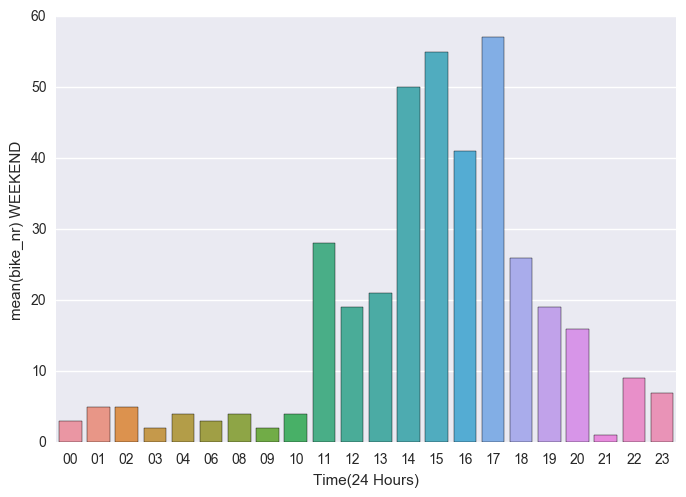

In [3]:
ax = sns.barplot(data=weekend_trip_count_time,y='bike_nr',x=weekend_trip_count_time.index);
ax.set(xlabel='Time(24 Hours)', ylabel='mean(bike_nr) WEEKEND')
plt.savefig(os.path.join("..",'extra','analysis1_2.png'),bbox_inches='tight')
plt.show()
